#EE 240 hw1 Ziyan Zhang, SID: 862468175




## H1.1 (create sections/sub-sections as hw questions)

Funtions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def flip_coins(total_coins):
    status = np.zeros(total_coins)
    prob = np.random.uniform(size=total_coins)
    status[prob>0.5] = 1;
    return status

def run_flip(total_coins, total_flips):
    v1, vrand, vmin = None, None, None
    crand = np.random.choice(total_coins)
    head_sum = np.zeros(total_coins)

    for flip in range(total_flips):
      head_sum = head_sum + flip_coins(total_coins)

    cmin = np.argmin(head_sum)
    head_freq = head_sum/total_flips

    v1 = head_freq[0]
    vrand = head_freq[crand]
    vmin = head_freq[cmin]
    return v1, vrand, vmin

def hoeffding_bound(epsilon, n):
    return 2.0*np.exp(-2.0*n*epsilon**2)

### (a) Because the coins are fair, $ μ $ is 0.5 for three coins.

In [ ]:
# code for question a, fractions of three coins
total_coins = 1000
total_flips = 10
run_flip(total_coins, total_flips)

(0.4, 0.8, 0.0)

### (b)

In [ ]:
# code for question b
total_coins = 1000
total_flips = 10
total_runs = 100000
V1, Vrand, Vmin = [], [], []
for run in range(total_runs):
    v1, vrand, vmin = run_flip(total_coins, total_flips)
    V1.append(v1)
    Vrand.append(vrand)
    Vmin.append(vmin)

(array([6.2294e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        3.7703e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 3.0000e+00]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <BarContainer object of 10 artists>)

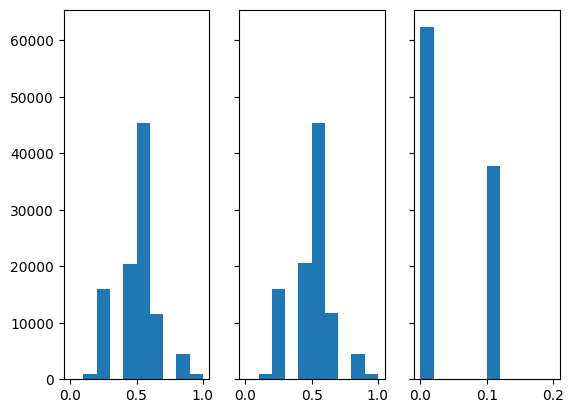

In [ ]:
fig, axs = plt.subplots(1,3,sharey=True)
axs[0].hist(V1,10)
axs[1].hist(Vrand,10)
axs[2].hist(Vmin,10)

### (c)

In [ ]:
np.array(V1)

array([0.5, 0. , 0.6, ..., 0.6, 0.3, 0.3])

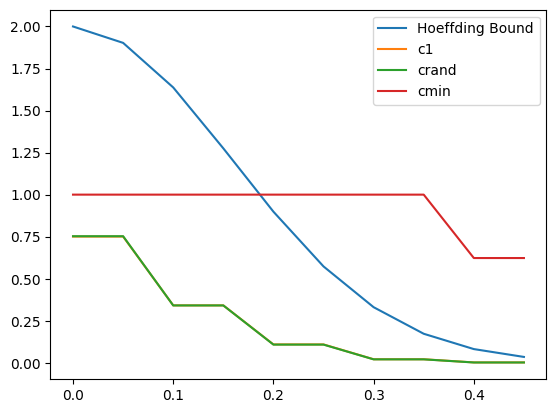

In [ ]:
epsilon = np.arange(0.0, 0.5, 0.05)
bounds = hoeffding_bound(epsilon, total_flips)
V1, Vrand, Vmin = np.array(V1), np.array(Vrand), np.array(Vmin)
V1d = np.abs(V1-0.5)
Vrandd = np.abs(Vrand-0.5)
Vmind = np.abs(Vmin-0.5)

p1, prand, pmin = np.zeros(len(epsilon)), np.zeros(len(epsilon)), np.zeros(len(epsilon))

for id in range(epsilon.shape[0]):
    ep = epsilon[id]
    p1[id] = np.sum(V1d>ep)/total_runs
    prand[id] = np.sum(Vrandd>ep)/total_runs
    pmin[id] = np.sum(Vmind>ep)/total_runs

plt.plot(epsilon, bounds, label='Hoeffding Bound')
plt.plot(epsilon, p1, label = 'c1')
plt.plot(epsilon, prand, label = 'crand')
plt.plot(epsilon, pmin, label = 'cmin')
plt.legend();



### (d)

c1 and crand obey the bound, cmin not.\
Because cmin is the selected coin with minimum frequency in each run, it deviates the real $μ$. It is selected after sampleing, however, Hoeffding inquality requires the hypothesis has been choosen before the sample are drawn.

## H1.2

(a) The probility of the selected balls are red and blue: $\frac{4}{10}*(0.3*0.7+0.7*0.3)+\frac{6}{10}*(0.3*0.7+0.7*0.3) = 0.42$\
The propability that we selected bin A and the selected balls are red and blue: $\frac{4}{10}*(0.3*0.7+0.7*0.3) = 0.168$\
Thus, the probability that we selected bin A given the selected balls are red and blue: $\frac{0.168}{0.42} = 0.4$\
(b) The probility of the selected balls are red and blue: $\frac{4}{10}*(0.1*0.3+0.3*0.1)+\frac{6}{10}*(0.4*0.2+0.2*0.4) = 0.12$\
The propability that we selected bin A and the selected balls are red and blue: $\frac{4}{10}*(0.1*0.3+0.3*0.1) = 0.024$\
Thus, the probability that we selected bin A given the selected balls are red and blue: $\frac{0.024}{0.12} = 0.2$

##H1.3

$\mu_{+}=\frac{1}{N_{+}} \sum_{i: y_i=+1} \mathbf{x}_i$\
$\mu_{-}=\frac{1}{N_{-}} \sum_{i: y_i=-1} \mathbf{x}_i$\
$\left\|\mathbf{x}-\mu_{-}\right\|_2^2=-2\left\langle\mu_{-}, \mathbf{x}\right\rangle+\left\|\mu_{-}\right\|_2^2+\left\|\mathbf{x}\right\|_2^2$\
$\left\|\mathbf{x}-\mu_{+}\right\|_2^2=-2\left\langle\mu_{+}, \mathbf{x}\right\rangle+\left\|\mu_{+}\right\|_2^2+\left\|\mathbf{x}\right\|_2^2$\
$\mathbf{w}^T\mathbf{x}+b=\left\|\mathbf{x}-\mu_{-}\right\|_2^2-\left\|\mathbf{x}-\mu_{+}\right\|_2^2$\
$=2\left\langle\mu_{+}, \mathbf{x}\right\rangle-2\left\langle\mu_{-}, \mathbf{x}\right\rangle+\left\|\mu_{-}\right\|_2^2-\left\|\mu_{+}\right\|_2^2$\
$=\sum_{n+=1}^{N+} \frac{2}{N_{+}}\left\langle \mathbf{x_{n+}}, \mathbf{x}\right\rangle - \sum_{n-=1}^{N-} \frac{2}{N_{-}}\left\langle \mathbf{x_{n-}}, \mathbf{x}\right\rangle + \left\|\mu_{-}\right\|_2^2-\left\|\mu_{+}\right\|_2^2$\
$= \sum_{n=1}^N α_n\left\langle\mathbf{x_n},\mathbf{x}\right\rangle + b$\
So, if n is n+, $α_n = \frac{2}{N_+}$, if n is n-, $α_n = -\frac{2}{N_-}$

##H1.4

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X,y = mnist.data, mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
import numpy as np
from collections import Counter

def plot_digit(data,index):
    for i in range(5):
      if i==0:
        image = (data[index[i]].reshape(28,28))
      if i>0:
        image = np.append(image, data[index[i]].reshape(28,28),axis=1)
    print(image)
    plt.imshow(image, cmap = mpl.cm.binary, interpolation = "nearest")
    plt.axis("off")

def knn(test,train,label,n):
    d = np.zeros(len(train))
    for id in range(len(train)):
      for i in range(784):
        d[id] = d[id] + (train[id][i]-test[i])**2
      d[id] = d[id]**0.5

    min_index = []
    dcp = copy.deepcopy(d)
    for _ in range(n):
      index = np.argmin(dcp)
      dcp[index] = 100000
      min_index.append(index)
    dcp = []

    nnlabels = label[min_index]
    maxlabel = Counter(nnlabels).most_common(1)[0][0]

    return maxlabel

In [ ]:
#train data
train_1 = [X.loc[0]]
train_2 = [X.loc[0]]
train_7 = [X.loc[0]]
for n in range(len(y[:60000])):
  if y[n] == '1':
    train_1 = np.append(train_1,[X.loc[n]],axis=0)
  if y[n] == '2':
    train_2 = np.append(train_2,[X.loc[n]],axis=0)
  if y[n] == '7':
    train_7 = np.append(train_7,[X.loc[n]],axis=0)
train = np.concatenate((train_1[501:701],train_2[2201:2401],train_7[1051:1251]))
label = np.concatenate((np.full(200,'1'),np.full(200,'2'),np.full(200,'7')))

In [ ]:
#test data
test_1 = [X.loc[0]]
test_2 = [X.loc[0]]
test_7 = [X.loc[0]]
for n in range(len(y[60000:])):
  if y[n] == '1':
    test_1 = np.append(test_1,[X.loc[n]],axis=0)
  if y[n] == '2':
    test_2 = np.append(test_2,[X.loc[n]],axis=0)
  if y[n] == '7':
    test_7 = np.append(test_7,[X.loc[n]],axis=0)
test = np.concatenate((test_1[71:141],test_2[1:71],test_7[141:211]))
labelr = np.concatenate((np.full(70,'1'),np.full(70,'2'),np.full(70,'7')))

In [ ]:
labelt = []
index_right, index_wrong = [], []
for it in range(len(test)):
  labelt.append(knn(test[it],train,label,1))
  if labelt[it] == labelr[it]:
    index_right.append(it)
  if labelt[it] != labelr[it]:
    index_wrong.append(it)
#fraction of 1NN
frac1 = sum(labelt==labelr)/len(labelr)
frac1

0.9619047619047619

In [ ]:
labelt = []
for it in range(len(test)):
  labelt.append(knn(test[it],train,label,3))
#fraction of 3NN
frac3 = sum(labelt==labelr)/len(labelr)
frac3

0.9523809523809523

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


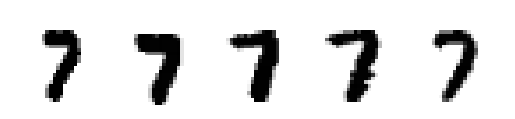

In [ ]:
#plot correct recogniztion
plot_digit(test,index_right[140:150])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


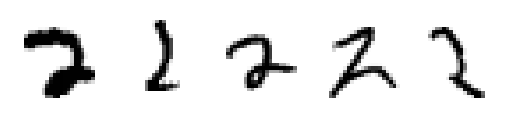

In [ ]:
#plot incorrect recogniztion
plot_digit(test,index_wrong)

The '2' is recognized as '7', because their patterns are similar.

##H1.5

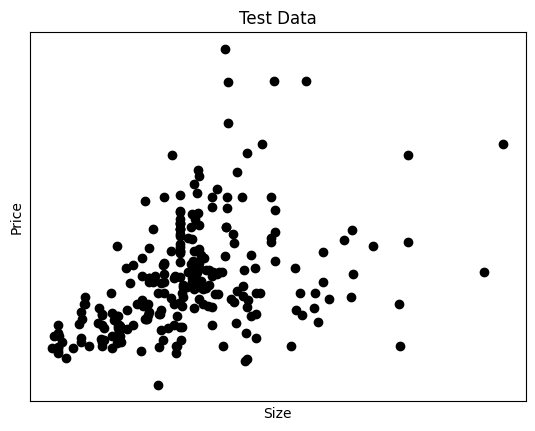

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
from numpy.linalg import inv

# Load CSV and columns
df = pd.read_csv('/Housing.csv')
Y = df['price']
X = df['lotsize']
X = X.values
Y = Y.values
# Split the data into training/testing sets
X_train = X[:-250]
X_test = X[-250:]
# Split the targets into training/testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]
# Plot outputs
plt.scatter(X_test, Y_test, color='black')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
plt.show()


In [ ]:
def linear_func(X, y):
  X_c = np.concatenate((X, np.ones((X.shape[0],1))),axis=1)
  res = inv(X_c.T @ X_c)@X_c.T@y
  w = res[:-1]
  b = res[-1:]
  return w,b

([], [])

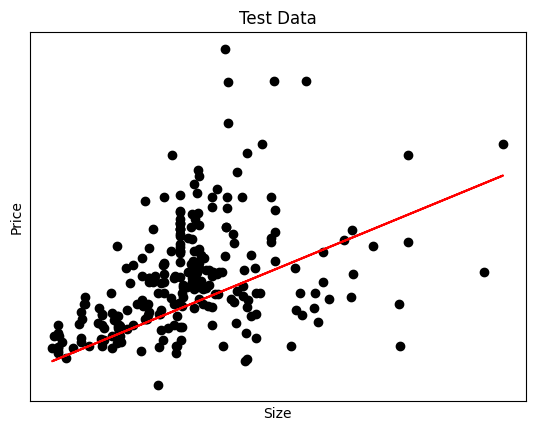

In [ ]:
#(a)
X_train = X_train.reshape(-1,1)
Y_train = Y_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
w,b = linear_func(X_train,Y_train)
Y_pre = X_test@w+b
plt.scatter(X_test, Y_test, color='black')
plt.plot(X_test, Y_pre, color='red')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())

[[5.10577087e+00]
 [5.35214283e+03]
 [1.45545478e+04]] [[1992.61019557]] [[ 57375.49179987]
 [ 48533.59160226]
 [ 55077.89490631]
 [ 47878.75797317]
 [ 48082.98880815]
 [ 73858.21514015]
 [ 47878.75797317]
 [ 53435.13164185]
 [ 62217.05754612]
 [ 57298.90523675]
 [101867.76412871]
 [ 69972.01347525]
 [ 56864.91471242]
 [ 76759.58795406]
 [ 60174.74919629]
 [ 78013.6026027 ]
 [ 47920.89909732]
 [ 75239.87406066]
 [ 80090.3563915 ]
 [ 69662.5664384 ]
 [ 58132.44084646]
 [ 58132.44084646]
 [ 67712.16196431]
 [ 59153.59502138]
 [ 60685.32628375]
 [ 79579.77930404]
 [ 89280.74396573]
 [ 63238.21172104]
 [ 86472.56998472]
 [ 92497.37961671]
 [ 72590.6890061 ]
 [ 80243.52951774]
 [ 82898.53037252]
 [ 77917.30298543]
 [ 83689.92485808]
 [127367.0796742 ]
 [ 64778.859568  ]
 [ 46908.661507  ]
 [ 68343.98259561]
 [ 66923.28333533]
 [ 85145.06955733]
 [100005.96358671]
 [ 79312.47339135]
 [ 52516.09288443]
 [ 47767.72597108]
 [ 47920.89909732]
 [ 80862.03782291]
 [ 75239.87406066]
 [ 55579.555409

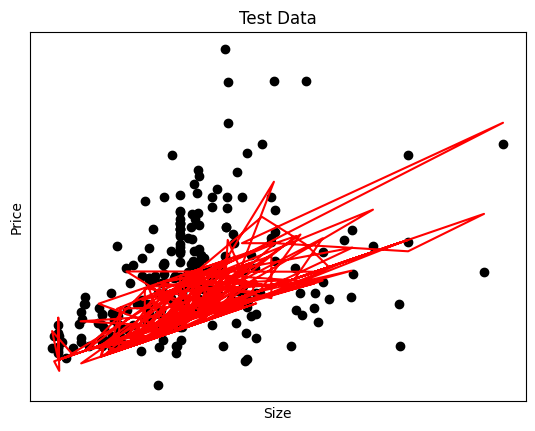

In [242]:
X = df[['lotsize', 'bedrooms', 'bathrms']]
X = X.values
X_train = X[:-250]
X_test = X[-250:]
X_train = X_train.reshape(-1,3)
Y_train = Y_train.reshape(-1,1)
X_test = X_test.reshape(-1,3)
w,b = linear_func(X_train,Y_train)
Y_pre = X_test@w+b
plt.scatter(X_test[:,0], Y_test, color='black')
plt.plot(X_test[:,0], Y_pre, color='red')
plt.title('Test Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.xticks(())
plt.yticks(())
print(w,b,Y_pre)